In [17]:
import os
import pandas as pd
from tensorflow.python.summary.summary_iterator import summary_iterator

In [22]:
def convert_tb_data(root_dir, sort_by=None):

    def convert_tfevent(filepath):
        return pd.DataFrame([
            parse_tfevent(e) for e in summary_iterator(filepath) if len(e.summary.value)
        ])

    def parse_tfevent(tfevent):
        return dict(
            wall_time=tfevent.wall_time,
            name=tfevent.summary.value[0].tag,
            step=tfevent.step,
            value=float(tfevent.summary.value[0].simple_value),
        )

    columns_order = ['wall_time', 'name', 'step', 'value']
    
    out = []
    for (root, _, filenames) in os.walk(root_dir):
        for filename in filenames:
            if 'events.out.tfevents' not in filename:
                continue
            file_full_path = os.path.join(root, filename)
            out.append(convert_tfevent(file_full_path))
            
    # Concatenate (and sort) all partial individual dataframes
    all_df = pd.concat(out)[columns_order]
    if sort_by is not None:
        all_df = all_df.sort_values(sort_by)
        
    return all_df.reset_index(drop=True)

In [23]:
dir_path = '/opt/ml/code/image-classification-level1-06/model/effi_b2_pr_fold/'
df = convert_tb_data(dir_path)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [25]:
df[df.name == 'Val/f1-score']

,wall_time,name,step,value
46,1.630504e+09,Val/f1-score,0,0.444253
94,1.630504e+09,Val/f1-score,1,0.647580
142,1.630504e+09,Val/f1-score,2,0.709771
190,1.630504e+09,Val/f1-score,3,0.672324
238,1.630504e+09,Val/f1-score,4,0.684619
286,1.630504e+09,Val/f1-score,5,0.717129
334,1.630504e+09,Val/f1-score,6,0.711361
382,1.630504e+09,Val/f1-score,7,0.718053
430,1.630504e+09,Val/f1-score,8,0.722786
478,1.630504e+09,Val/f1-score,9,0.715138


In [27]:
import matplotlib.pyplot as plt

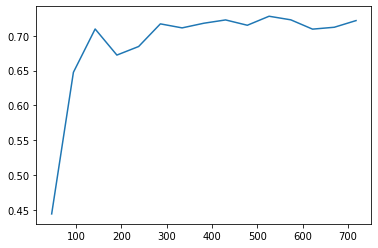

In [28]:
plt.plot('value', data=df[df.name == 'Val/f1-score'])